<a href="https://colab.research.google.com/github/vgorbikov/image_processing/blob/main/02_nn_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Полносвязная (искусственная) нейронная сеть

В этом задании вам предстоит реализовать полносвязную двухслойную нейронную сеть с помощью библиотеки Numpy и применить её для классификации.

Архитектура сети будет выглядеть следующим образом:

Входные данные $→$ Линейный слой $→$ Функция активации $→$ Линейный слой $→$ Softmax $→$ Loss

# 1. Датасет

Для задачи будем использовать датасет CIFAR-10 [[ссылка](https://www.cs.toronto.edu/~kriz/cifar.html)]. Загрузим датасет, приведем значения пикселей к интервалу $[0, 1]$, а также осуществим one-hot кодирование целевого вектора.

Отобразите несколько изображений и соответствующие им классы.

Размер датасета: 
Train: 50000 
Validation: 10000

На изображении: класс №1


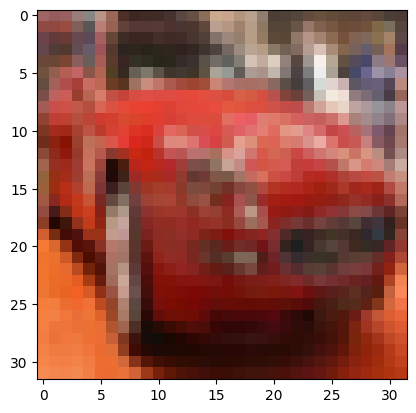

In [14]:
import numpy as np
from numpy import ndarray
from keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt

# Загрузка датасета
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.cifar10.load_data()

x_train = (x_train/255.0).astype('float32')
x_val = (x_val/255.0).astype('float32')
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

prev_no = 5
print(f'Размер датасета: \nTrain: {x_train.shape[0]} \nValidation: {x_val.shape[0]}\n')
plt.imshow(x_train[prev_no])
print(f'На изображении: класс №{np.argmax(y_train[prev_no])}')


# 2. Реализация слоев нейронной сети
В этом пункте необходимо реализовать forward pass и backward pass для используемых слоев. Функции должны возвращать либо результат действия слоя на входные данные, либо, если `get_grad=True`, градиент(ы).

1. **Линейный слой**
$$ f(x, W, b) = xW + b $$


In [26]:
def linear(x: ndarray, W: ndarray, b: float, get_grad=False):
    ret_arr = np.empty(len(x))
    print(x)

    for n_i in range(len(W)):
      ret_arr[n_i] = np.dot(x, W[n_i]) + b

    return ret_arr

# доделать

2. **ReLU**

$$ ReLU(x) = max(x, 0)$$
В качестве функции активации будем использовать ReLU; напишите функцию, реализующую его работу.

In [27]:
def relu(x, get_grad=False):
    return 0 if x<0 else x

3. **Softmax + Cross-entropy loss**

$$s_i(x) = \frac{e^{x_i}}{\sum\limits_{j}^K e^{x_j}} $$
$$CE(y, \hat{y}) = - \frac{1}{N}\sum\limits_i^N \sum\limits_j^K y_j \ln\hat{y_j}$$
где $K-$количество классов, $N-$ количество объектов.

Если мы используем Softmax вместе с функцией потерь в виде кросс-энтропии, то удобно объединить их вместе в один слой из-за удобства получаемых выражений. Напишите выражения для функции потерь и для градиента (можно без полного вывода) и реализуйте функцию аналогичную прошлому пункту.

In [ ]:
def softmax_ce(y_true, x, get_grad=False):
    # YOUR CODE HERE
    pass

# 3. Обучение
До начала обучения необходимо сделать еще несколько шагов:

- **Инициализация весов**. Начальные значения матриц весов могут сильно влиять на ход обучения. Инициализируйте матрицы $W$ и $b$ случайными числами из нормального распределения.
- Выбор **темпа обучения (learning rate)**. Гиперпараметр, отвечающий за размер шага в алгоритме градиентного спуска.
- Выбор **количества нейронов в скрытом слое**
- **Размер батча**. В глубоком обучении через нейронную сеть редко пропускают сразу весь датасет. Вместо этого входные данные делят на части, которые называются **батчи (batch)**, и пропускают по очереди через сеть, обновляя веса после каждой итерации. Когда все батчи из датасета были использованы для forward и backward проходов, заканчивается **эпоха обучения**.

    Такой подход позволяет избежать проблем с памятью (датасет может не помещаться в память целиком), а также улучшить сходимость (обновляем веса после каждого батча, а не только один раз после прохода всего датасета).

    Выберите размер батча и разбейте датасет на части.

In [ ]:
NUM_EPOCH =
BATCH_SIZE_TRAIN =
BATCH_SIZE_VAL =

INPUT_SIZE = 32 * 32 * 3 # размер картинки
HIDDEN_SIZE =
OUTPUT_SIZE = 10 # 10 классов
LR =

# YOUR CODE HERE

Реализуйте процесс обучения сети с заданными параметрами. В конце каждой эпохи выводите значения тренировочного и валидационного **лосса**, а также метрики
**Accuracy**. В конце обучения постройте зависимости лоссов и метрик от номера эпохи.

Вам необходимо достичь значения Accuracy на валидационном датасете в 50% или более.

In [ ]:
# YOUR CODE HERE

## **Перед отправкой сохраните ноутбук с именем в следующем формате: 02_Фамилия.ipynb**